In [2]:
import cv2
import pandas as pd
import numpy as np
import fitz
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\paoma\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


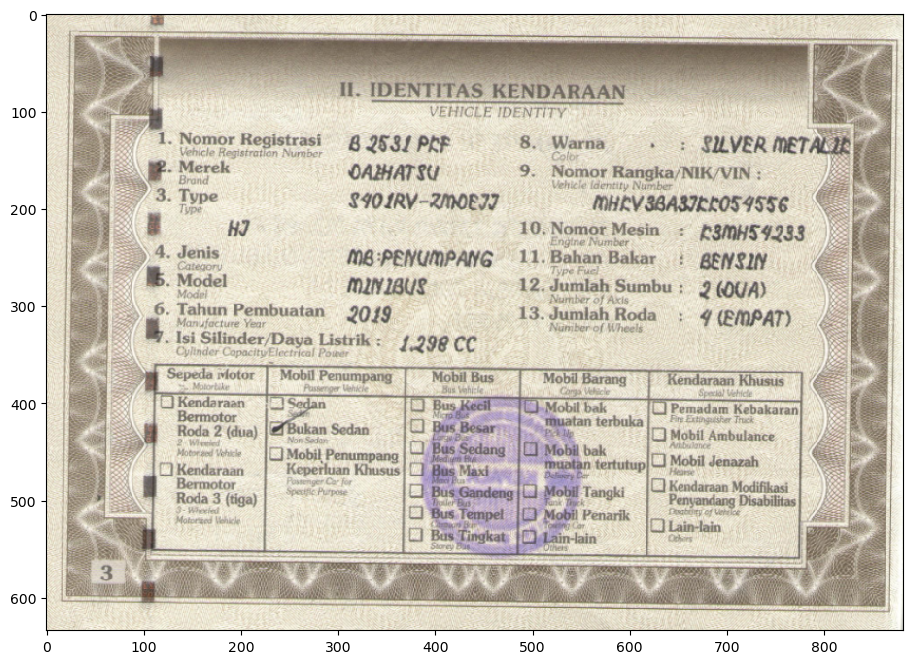

In [15]:
bpkb = cv2.imread("bpkb_p2.png")
bpkb = cv2.cvtColor(bpkb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,8))
plt.imshow(bpkb)     

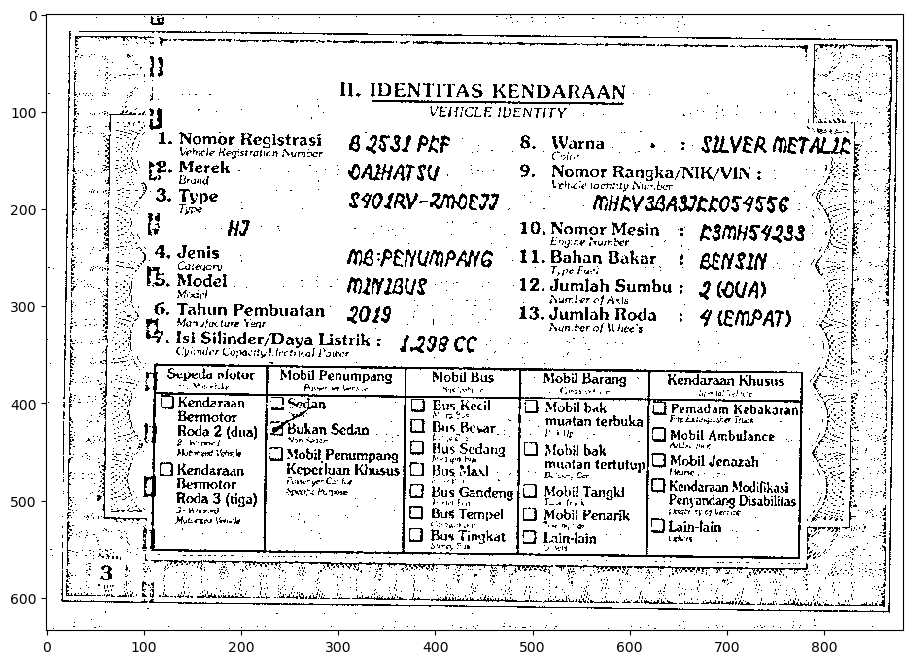

In [16]:
# make threshold image (maybe more optimal values exists)
gray = cv2.cvtColor(bpkb, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 23)
plt.figure(figsize=(30,8))
plt.imshow(thresh, cmap="gray")

In [17]:
thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

v1 = thresh[110:145,300:480]
v2 = thresh[145:175,300:480]
v3 = thresh[175:235,180:480]
v4 = thresh[235:265,300:480]
v5 = thresh[265:295,300:480]
v6 = thresh[295:325,300:480]
v7 = thresh[325:355,350:480]
v8 = thresh[90:150,660:790]
v9 = thresh[183:210,520:790]
v10 = thresh[210:240,660:790]
v11 = thresh[240:270,660:790]
v12 = thresh[270:300,660:790]
v13 = thresh[300:330,660:790]

threshs = [v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13]
rois = [bpkb[110:145,300:480], bpkb[145:175,300:480], bpkb[175:235,180:480],
        bpkb[235:265,300:480], bpkb[265:295,300:480], bpkb[295:325,300:480],
        bpkb[325:355,350:480], bpkb[90:150,660:790], bpkb[183:210,520:790],
        bpkb[210:240,660:790], bpkb[240:270,660:790], bpkb[270:300,660:790],
        bpkb[300:330,660:790]]

In [19]:
# define OCR model
checkpoint = "microsoft/trocr-base-printed" 
processor = TrOCRProcessor.from_pretrained(checkpoint)
model = VisionEncoderDecoderModel.from_pretrained(checkpoint)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
for t in threshs:
    v = processor(t, return_tensors="pt").pixel_values

    gen_ids = model.generate(v)
    gen_text = processor.batch_decode(gen_ids, skip_special_tokens=True)[0]

    print(gen_text)

c:\Users\paoma\miniconda3\lib\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


8 2532 PLF : :
DAHAT$0.00
HJ : S90IRV-ZMOE77
M8:PENUMPANG
MINIBUS :
2019 / 1 : 6/1
1.29B CC :.:
SILVER MET,
WHCV33A37CR05 9556 :
R3MH54283
BEN&IN :
2 (00A)
4 (EMPAT) :


In [21]:
for r in rois:
    v = processor(r, return_tensors="pt").pixel_values

    gen_ids = model.generate(v)
    gen_text = processor.batch_decode(gen_ids, skip_special_tokens=True)[0]

    print(gen_text)

c:\Users\paoma\miniconda3\lib\site-packages\transformers\generation\utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


8 2531 PCF
0AHHATSU
HJ S90IRV-ZMOE77
MB PENUMPAYG
M2N18US
2019
1.29B CC
SILVER MET.
WHCV38A37CR05 9556
R3MH59233
BENSLY
2 600A)
4 (EMPAT)
